In [1]:
from src.data.make_dataset import generate_dataset
from src.models.train_model import GridGP

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


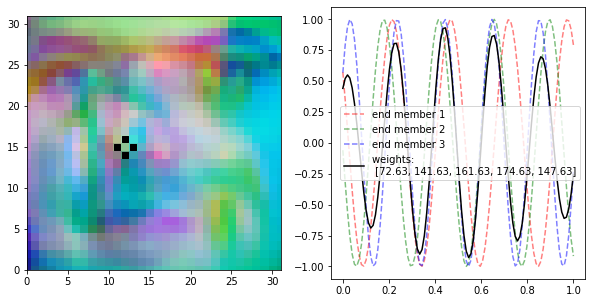

In [2]:
face_image, xanes_data, xanes_energy, xanes_cpts = generate_dataset(n_cpts=5, seed=100, supply_truth=True, xanes='trig')
x=12
y=15

fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].imshow(face_image[:, :, :3]/face_image.max()) # Plots in RGB
axes[0].scatter([x, x, x-1, x+1], [y+1, y-1, y, y], marker='s', c='k')
axes[0].set_ylim(0,31)
axes[0].set_xlim(0,31)
# outline around x, y point
axes[1].plot(xanes_energy, xanes_cpts[0], 'r--', label='end member 1', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[1], 'g--', label='end member 2', alpha=0.5)
axes[1].plot(xanes_energy, xanes_cpts[2], 'b--', label='end member 3', alpha=0.5)

axes[1].plot(xanes_energy, xanes_data[x*32 + y], 'k', label=f'weights: \n {[round(k,2) for k in face_image[x, y,:]]}')
axes[1].legend()

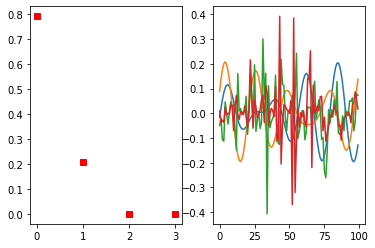

In [3]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=4)
subset_cpts = pca_model.fit_transform(xanes_data)

plt.close()
fix, axes = plt.subplots(1,2)
axes[0].plot(pca_model.explained_variance_ratio_, 'rs')
axes[1].plot(pca_model.components_.T)

In [4]:
from src.models.train_model import BO_loop
from src.models.acquisition import Random, MaxVariance

In [5]:
%%time
gp_model, init_obs, train_x, test_x, variances_R, errors_R, cpts_subset, chosen_R = BO_loop(xanes_data, n_cpts=4, BO_iters=10, acq_func=MaxVariance)

Wall time: 16.3 s


Iter 10/2000: 0.8776164054870605
Iter 20/2000: 0.6688816547393799
Iter 30/2000: 0.6690651178359985


(<Figure size 504x504 with 4 Axes>,
 array([[<AxesSubplot:xlabel='iter', ylabel='max variance'>,
         <AxesSubplot:xlabel='iter', ylabel='Mean squared error'>],
        [<AxesSubplot:title={'center':'ground truth'}>,
         <AxesSubplot:title={'center':'mean'}>]], dtype=object))

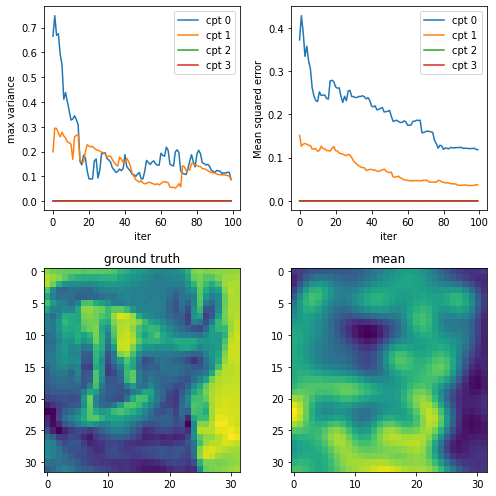

In [11]:
from src.visualization.visualize import plot_component_comp

plot_component_comp(xanes_data, cpts_subset, train_x, test_x, variances_R, errors_R)

In [7]:
errors_R

[0.005123914613396046,
 0.005362250822145421,
 0.005161790667304046,
 0.004715417932775332,
 0.004408528403009079,
 0.003785308127493093,
 0.003820548299993589,
 0.0036941013379238473,
 0.0037201479927248737,
 0.004062112533833275]

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error?

Signature:
mean_squared_error(
    y_true,
    y_pred,
    *,
    sample_weight=None,
    multioutput='uniform_average',
    squared=True,
)
Docstring:
Mean squared error regression loss.

Read more in the :ref:`User Guide <mean_squared_error>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Estimated target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
    Defines aggregating of multiple output values.
    Array-like value defines weights used to average errors.

    'raw_values' :
        Returns a full set of errors in case of multioutput input.

    'uniform_average' :
        Errors of all outputs are averaged with uniform weight.

squared : bool, default=Tr